In [5]:
import pandas as pd
data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col ='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [7]:
data.dropna().describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,150878.000000,150878.000000,150878.000000
mean,109.454539,49.594885,59.859655
std,139.444543,64.153845,86.599269
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,59.000000,27.000000,30.000000
75%,144.000000,67.000000,74.000000
max,1097.000000,698.000000,850.000000


In [18]:
#visualizing
from matplotlib import pyplot as plt
import seaborn; seaborn.set()

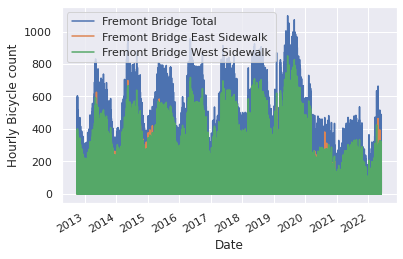

In [19]:
data.plot()
plt.ylabel('Hourly Bicycle count');

In [20]:
#hourly samples are far too dense for us to make much sense of. We can gain more insight by resampling the data to a coarser grid. Let’s resample by week

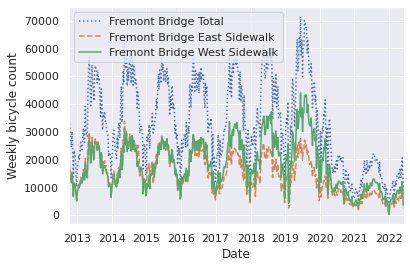

In [22]:
weekly = data.resample('W').sum()
weekly.plot(style=[':','--','-'])
plt.ylabel('Weekly bicycle count');

### This shows a trend that people bicycle more in the summer than the winter

###  Another method in handy for aggregation is to use a rolling mean utilizing the pd.rolling_mean()
### We'll do a 30 day rolling mean

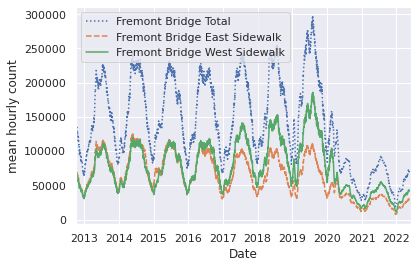

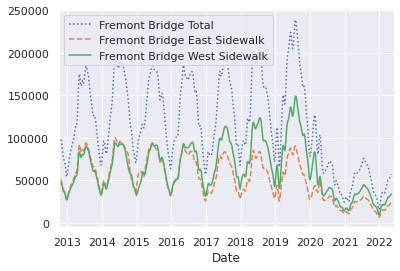

In [24]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');


### it looks so rough ,lets adjust this by using a window function

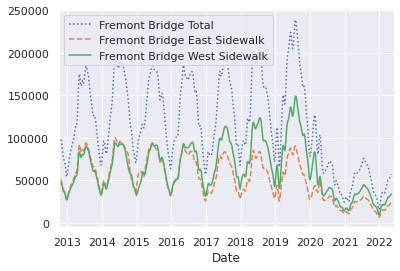

In [25]:
daily.rolling(50, center=True,
win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

###  Let's manipulate futher by looking at the average traffic as a function of the time of the day, by using the groupby function

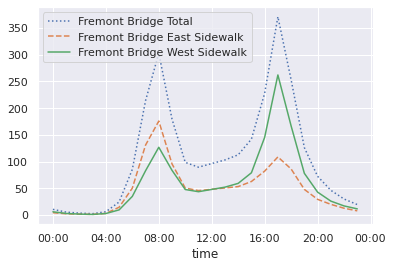

In [30]:
import numpy as np
by_time =data.groupby(data.index.time).mean()
hourly_ticks = 4*60*60*np.arange(7)
by_time.plot(xticks=hourly_ticks, style=[':','--','-']);

### To check how things change based on the days of the week

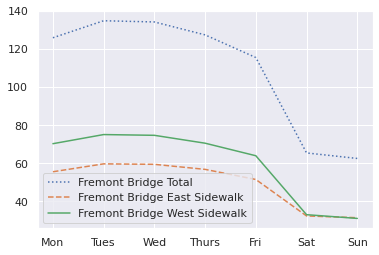

In [31]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

### The result shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

### lets do a hourly treand on weekdays versus weekend,we will start by grouping by both a flag marking the weekend and time of the day

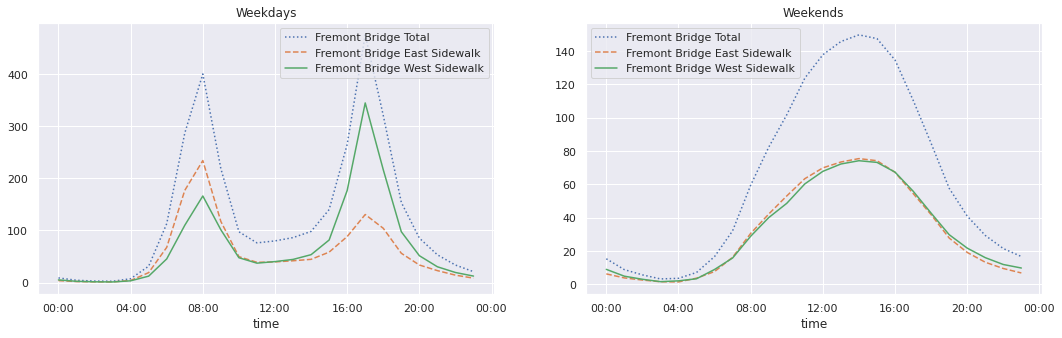

In [39]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

#plot to panels side by side

import matplotlib.pyplot as plt
fig,ax= plt.subplots(1, 2, figsize=(18, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
xticks=hourly_ticks, style=[':', '--', '-']);

### The result above is very interesting as we see a bimodal commute pattern during the week and a unimodal recreational pattern during weekends